In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Implementing Logistic Regression
# Importing the dataset

from sklearn.datasets import make_classification

In [3]:
# Create dataset
# X = Independent feature
# y = Dependent feature
# n_samples = Total number of samples
# n_features = Total number of features
# n_classes = Total number of classes
# random_state = Random state for reproducibility
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [4]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
# Implementing Logistic Regression
# Model Training
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = log_reg_model.predict(X_test)

In [7]:
# Peformance Metrics
# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (score*100.0))
# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Classification Report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 84.667%
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# Hyperparameters Tuning and Cross Validation


In [8]:
model_hpt = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['newton-cg', 'lbfgs','liblinear', 'saga', 'sag']

hyperparameters = dict(penalty=penalty, C=C, solver=solver)

In [9]:
# Grid Search CV Logistic Regression Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model_hpt, param_grid=hyperparameters, scoring='accuracy',cv=cv)

In [10]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga',
                                    'sag']},
             scoring='accuracy')

In [11]:
grid.fit(X_train, y_train)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.12/site-pack

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga',
                                    'sag']},
             scoring='accuracy')

In [12]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [13]:
grid.best_score_

np.float64(0.8785714285714287)

In [14]:
y_pred = grid.predict(X_test)

In [15]:
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.8533333333333334
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       157
           1       0.80      0.92      0.86       143

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300

[[124  33]
 [ 11 132]]


# Randomized SearchCV

In [16]:
# Implementing Randomized SearchCV
from sklearn.model_selection import RandomizedSearchCV


In [22]:
model = LogisticRegression()
random_cv = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, scoring='accuracy', cv=5)

In [23]:
random_cv.fit(X_train, y_train)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'saga',
                                                   'sag']},
                   scoring='accuracy')

In [24]:
print(random_cv.best_params_)
print(random_cv.best_score_)

{'solver': 'sag', 'penalty': 'l2', 'C': 0.1}
0.8728571428571428


In [25]:
y_pred = random_cv.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))


0.8533333333333334
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       149
           1       0.82      0.90      0.86       151

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300

[[120  29]
 [ 15 136]]


# Logistic Regression for Multi-Class Classification Problem

In [28]:
# Create a dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=42)

In [29]:
y

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1,

In [30]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [32]:
# Initializing the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

log_reg_model = OneVsRestClassifier(LogisticRegression())
log_reg_model.fit(X_train, y_train)
y_pred = log_reg_model.predict(X_test)

In [33]:
y_pred

array([2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1])

In [34]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (score*100.0))
# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Classification Report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 68.000%
[[79 16  8]
 [31 38 27]
 [ 3 11 87]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       103
           1       0.58      0.40      0.47        96
           2       0.71      0.86      0.78       101

    accuracy                           0.68       300
   macro avg       0.67      0.67      0.66       300
weighted avg       0.67      0.68      0.66       300



# Imbalanced Dataset

In [35]:
# Generating a imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
# Imbalanced dataset

# Weights = [0.99] means 99% of the samples belong to class 0 and 1% to class 1
# n_clusters_per_class = 1 means each class has only one cluster
# n_features = 2 means we have two features for classification
#n_redundant = 0 means no redundant features
# random_state = 10 for reproducibility

# X = Independent feature
# y = Dependent feature - class labels

X, y = make_classification(n_samples=10000, n_features=2,  n_clusters_per_class= 1,n_redundant=0, weights=[0.99], random_state=10)

In [44]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [52]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [49]:
import seaborn as sns
import pandas as pd

In [51]:
pd.DataFrame(X, columns=['Feature1', 'Feature2']).head()

,Feature1,Feature2
0,1.879910,-1.485035
1,0.377083,-2.238585
2,1.354312,-2.664638
3,-0.509843,-1.502950
4,0.863561,-1.906364


In [53]:
print(X.shape)  # (10000, 2)
print(pd.DataFrame(X)[0].shape)  # (10000,)
print(pd.DataFrame(X)[1].shape)  # (10000,)

(10000, 2)
(10000,)
(10000,)


<Axes: xlabel='0', ylabel='1'>

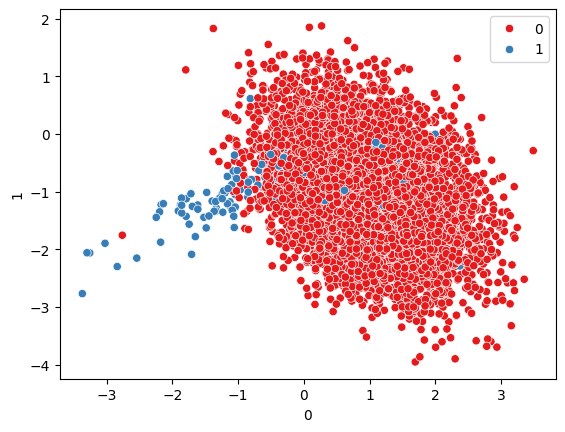

In [56]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y, palette='Set1')

In [59]:
# Solving Imbalanced Classification Problem using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

class_weight = []

for w in [1, 10, 50, 100]:
    for y in [1, 10, 50, 100]:
        class_weight.append({0: w, 1: y})

# Initializing the Logistic Regression model
logistic_model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [0.01, 0.1, 1, 10, 100]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag']
hyperparameters = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)


In [60]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [62]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=logistic_model, param_grid=hyperparameters, scoring='accuracy', cv=cv)

grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
y_pred = grid.predict(X_test)
print(y_pred)

Best Parameters: {'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.9881333333333334
[0 0 0 ... 0 0 0]


In [63]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (score * 100.0))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 99.200%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500

Confusion Matrix:
 [[2468    2]
 [  18   12]]


# Logistic Regression ROC

In [64]:
# ROC - Receiver Operating Characteristic
# ROC Curve - A graphical representation of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
# ROC AUC - Area Under the ROC Curve, a single scalar value that summarizes the performance of the model across all thresholds.

from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create a dataset - 2 Classes
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=1)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
# Generate a no skil prediction (Majority class)
dummy_model_probability = [0 for _ in range(len(y_test))]

# Default 0 as output

In [67]:
# Basic Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction based on the model's probability
model_probability = logistic_model.predict_proba(X_test)[:,1]  # Probability of class 1

In [69]:
# Calculate Scores
dummy_model_auc = roc_auc_score(y_test, dummy_model_probability)
model_auc = roc_auc_score(y_test, model_probability)
print("Dummy Model AUC:", dummy_model_auc)
print("Logistic Regression Model AUC:", model_auc)

Dummy Model AUC: 0.5
Logistic Regression Model AUC: 0.922092055566225
